In [1]:
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

In [2]:
missing_values = {
    'serumcholestrol':[0],
}
df = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv', na_values = missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 1000 datapoints in the dataset with 14 Features listed as ['patientid' 'age' 'gender' 'chestpain' 'restingBP' 'serumcholestrol'
 'fastingbloodsugar' 'restingrelectro' 'maxheartrate' 'exerciseangia'
 'oldpeak' 'slope' 'noofmajorvessels' 'target']:


In [3]:
duplicates = df.loc[df.duplicated(keep=False)]
duplicates

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target


In [4]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,NaN,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,NaN,0,2,136,0,5.3,3,2,1


In [5]:
features_with_null = [feature for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Features with Null Values ['serumcholestrol']


In [6]:
df=df.sample(frac=1)

In [7]:
df=df.interpolate(method='linear', axis=0)

In [8]:
duplicates.shape

(0, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 638 to 945
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   float64
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 117.2 KB


In [10]:
df.drop(columns=['patientid'], inplace=True)

In [11]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


**Continuous Values**

Keeping a basic concept in my mind, if a column contains continuous values then it will have good quantity of Unique Values.
Taking 10 as that threshold :

df[feature].unique())>10

In [12]:
columns = df.columns.values
for column in columns:
  print(f"{column} has {len(df[column].unique())} values. ")

age has 61 values. 
gender has 2 values. 
chestpain has 4 values. 
restingBP has 95 values. 
serumcholestrol has 376 values. 
fastingbloodsugar has 2 values. 
restingrelectro has 3 values. 
maxheartrate has 129 values. 
exerciseangia has 2 values. 
oldpeak has 63 values. 
slope has 4 values. 
noofmajorvessels has 4 values. 
target has 2 values. 


In [13]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>10]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']


In [14]:
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
638,70,1,1,166,215.0,0,2,117,1,5.5,2,2,1
234,20,1,0,140,498.0,0,0,137,1,0.2,3,2,1
172,58,0,2,200,239.0,0,0,138,1,1.6,2,2,1
350,64,1,0,100,331.0,0,0,77,0,5.4,1,1,0
345,29,1,2,171,277.0,1,0,161,1,4.8,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,63,1,0,140,242.0,1,0,187,1,1.9,2,1,1
178,59,0,0,137,378.0,0,1,120,0,1.9,1,1,0
851,58,1,0,105,325.0,0,0,122,1,4.4,0,0,0
788,62,1,0,122,268.0,1,0,121,1,1.5,0,0,0


In [15]:
df[Continuous_features].head()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
638,70,166,215.0,117,5.5
234,20,140,498.0,137,0.2
172,58,200,239.0,138,1.6
350,64,100,331.0,77,5.4
345,29,171,277.0,161,4.8


**Distribution of the Numerical Values**



In [16]:
df[Continuous_features].describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,328.600000,145.477000,2.707700
std,17.86473,29.965228,111.571074,34.190268,1.720753
min,20.00000,94.000000,85.000000,71.000000,0.000000
25%,34.00000,129.000000,248.000000,119.750000,1.300000
50%,49.00000,147.000000,326.500000,146.000000,2.400000
75%,64.25000,181.000000,408.000000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


In [17]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['restingBP'], name = 'restingBP', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['maxheartrate'], name = 'maxheartrate', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for maxheartrate and restingBP with Outliers")
fig.show()

In [18]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("restingBP Distribution", "maxheartrate Distribution"))

trace0 = go.Histogram(x=df['restingBP'], name = 'restingBP')
trace1 = go.Histogram(x=df['maxheartrate'], name = 'maxheartrate')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="restingBP", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="maxhearatrate", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="Histograph", height=700)


fig.show()

In [19]:
import numpy as np

In [20]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['restingBP', 'maxheartrate']])

For the feature restingBP, No of Outliers is 0
For the feature maxheartrate, No of Outliers is 0


In [21]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['age'], name = 'Age'))
fig.show()

In [22]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['age'].value_counts().index.to_list(),
                             y =df[df['target'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = df[df['target'] == 1]['age'].value_counts().index.to_list(),
                             y =df[df['target'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value",
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [23]:
fig = go.Figure([go.Pie(labels=df[df['target'] == 0]['age'].value_counts().index.to_list(),values=df[df['target'] == 0]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [24]:
fig = go.Figure([go.Pie(labels=df[df['target'] == 1]['age'].value_counts().index.to_list(),values=df[df['target'] == 1]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

**PCA**

we can convert out 12D dataset (because of 12 features) in 2D in order to visualize it.

In [25]:
target_value = df['target']
df_for_pca = df.drop(['target'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition #pca

In [27]:
import numpy as np

In [28]:
scaled_data = StandardScaler().fit_transform(df_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target_value)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [29]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'],
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

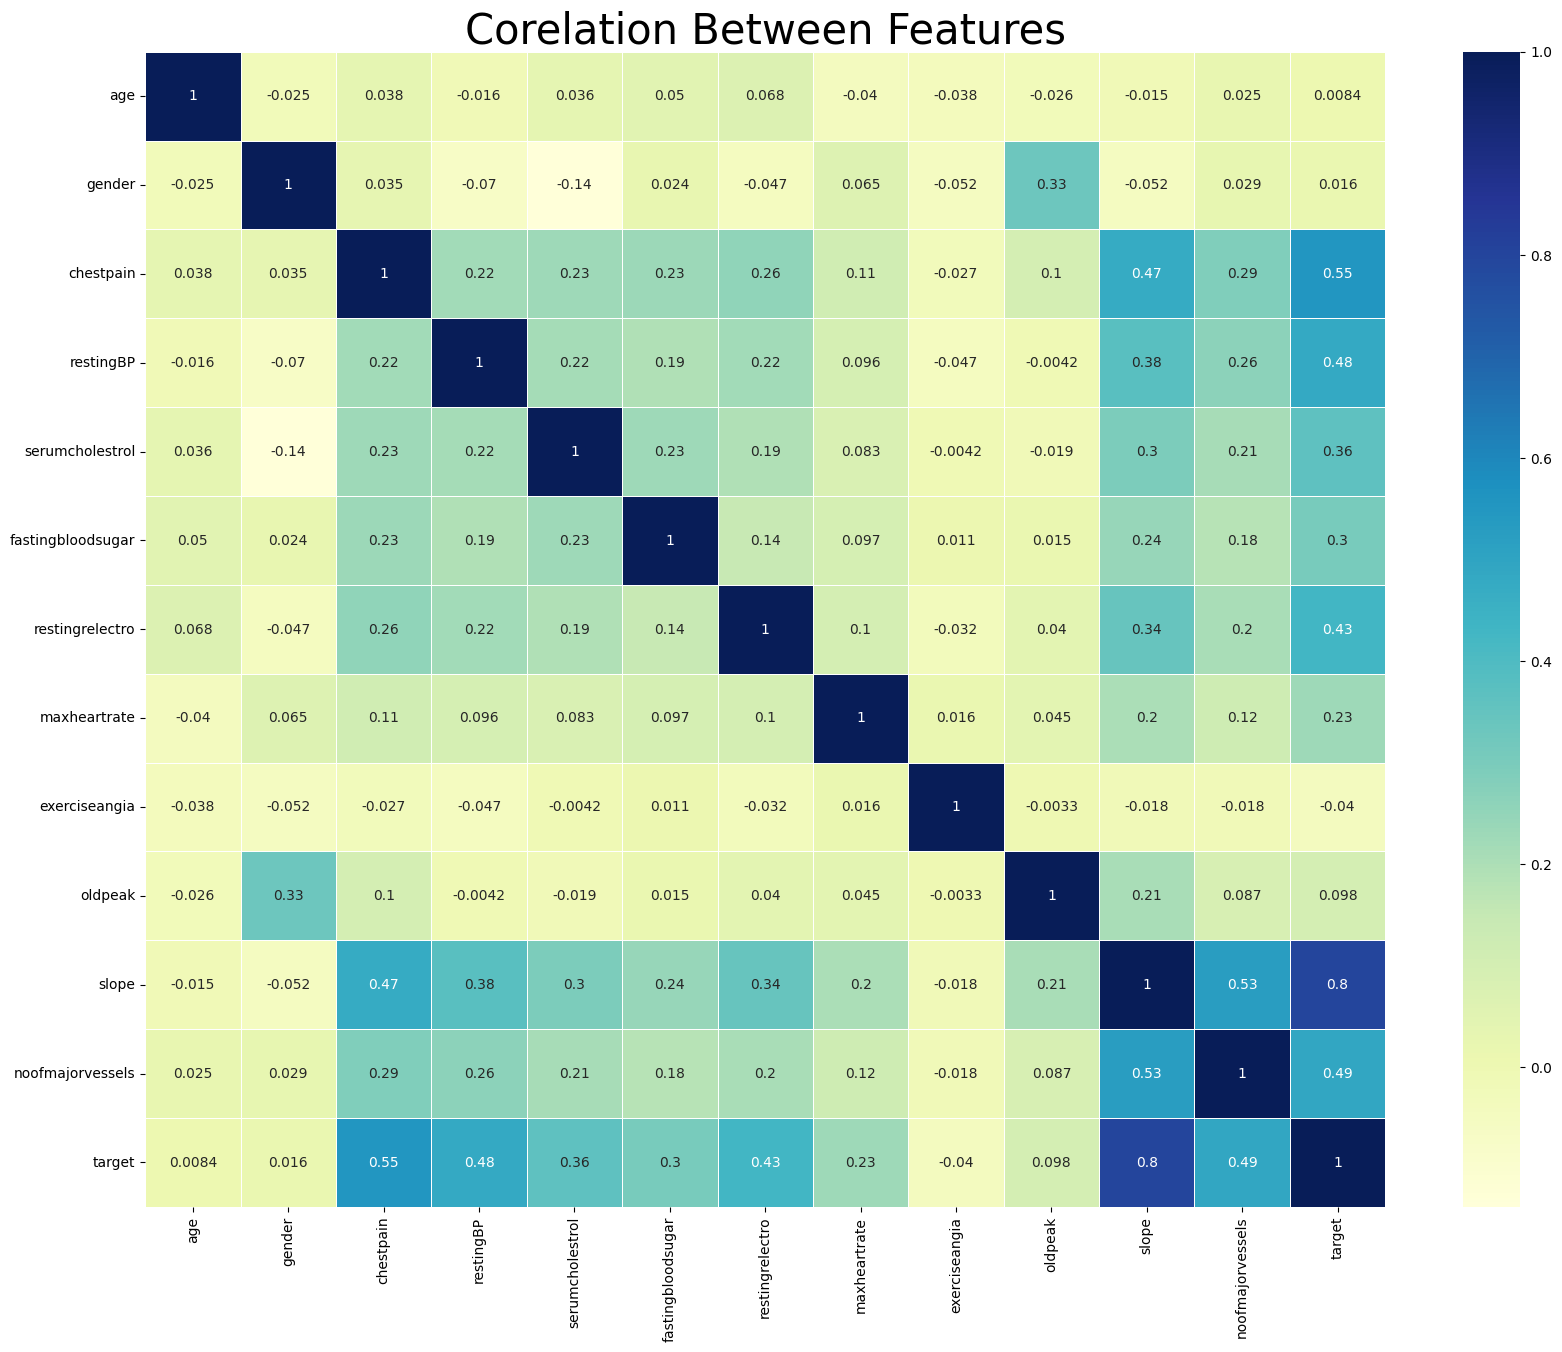

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

In [31]:
#Because we can see above that age has less correlation with target we can drop age column
df = df.drop('age', axis=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
columns = df.columns.values
print(columns)

['gender' 'chestpain' 'restingBP' 'serumcholestrol' 'fastingbloodsugar'
 'restingrelectro' 'maxheartrate' 'exerciseangia' 'oldpeak' 'slope'
 'noofmajorvessels' 'target']


In [35]:
df['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

In [36]:
for column in columns:
  feature_array=df[column].values.reshape(-1, 1)
  df[column]=scaler.fit_transform(feature_array)

In [37]:
df.head()

,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
638,1.0,0.333333,0.679245,0.251451,0.0,1.0,0.351145,1.0,0.887097,0.666667,0.666667,1.0
234,1.0,0.000000,0.433962,0.798839,0.0,0.0,0.503817,1.0,0.032258,1.000000,0.666667,1.0
172,0.0,0.666667,1.000000,0.297872,0.0,0.0,0.511450,1.0,0.258065,0.666667,0.666667,1.0
350,1.0,0.000000,0.056604,0.475822,0.0,0.0,0.045802,0.0,0.870968,0.333333,0.333333,0.0
345,1.0,0.666667,0.726415,0.371373,1.0,0.0,0.687023,1.0,0.774194,0.666667,1.000000,1.0


In [38]:
import numpy as np

In [39]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

In [40]:
print(X.shape)
print(y.shape)

(1000, 11)
(1000, 1)


In [41]:
from sklearn.model_selection import train_test_split

**Implementing CrossValidation**

In [42]:
from sklearn.metrics import  classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        80
         1.0       0.98      1.00      0.99       120

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Accuracy score of xgb   0.985
************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        85
         1.0       0.96      0.97      0.97       115

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of xgb   0.96
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        89
         1.0       0.98      0.95    

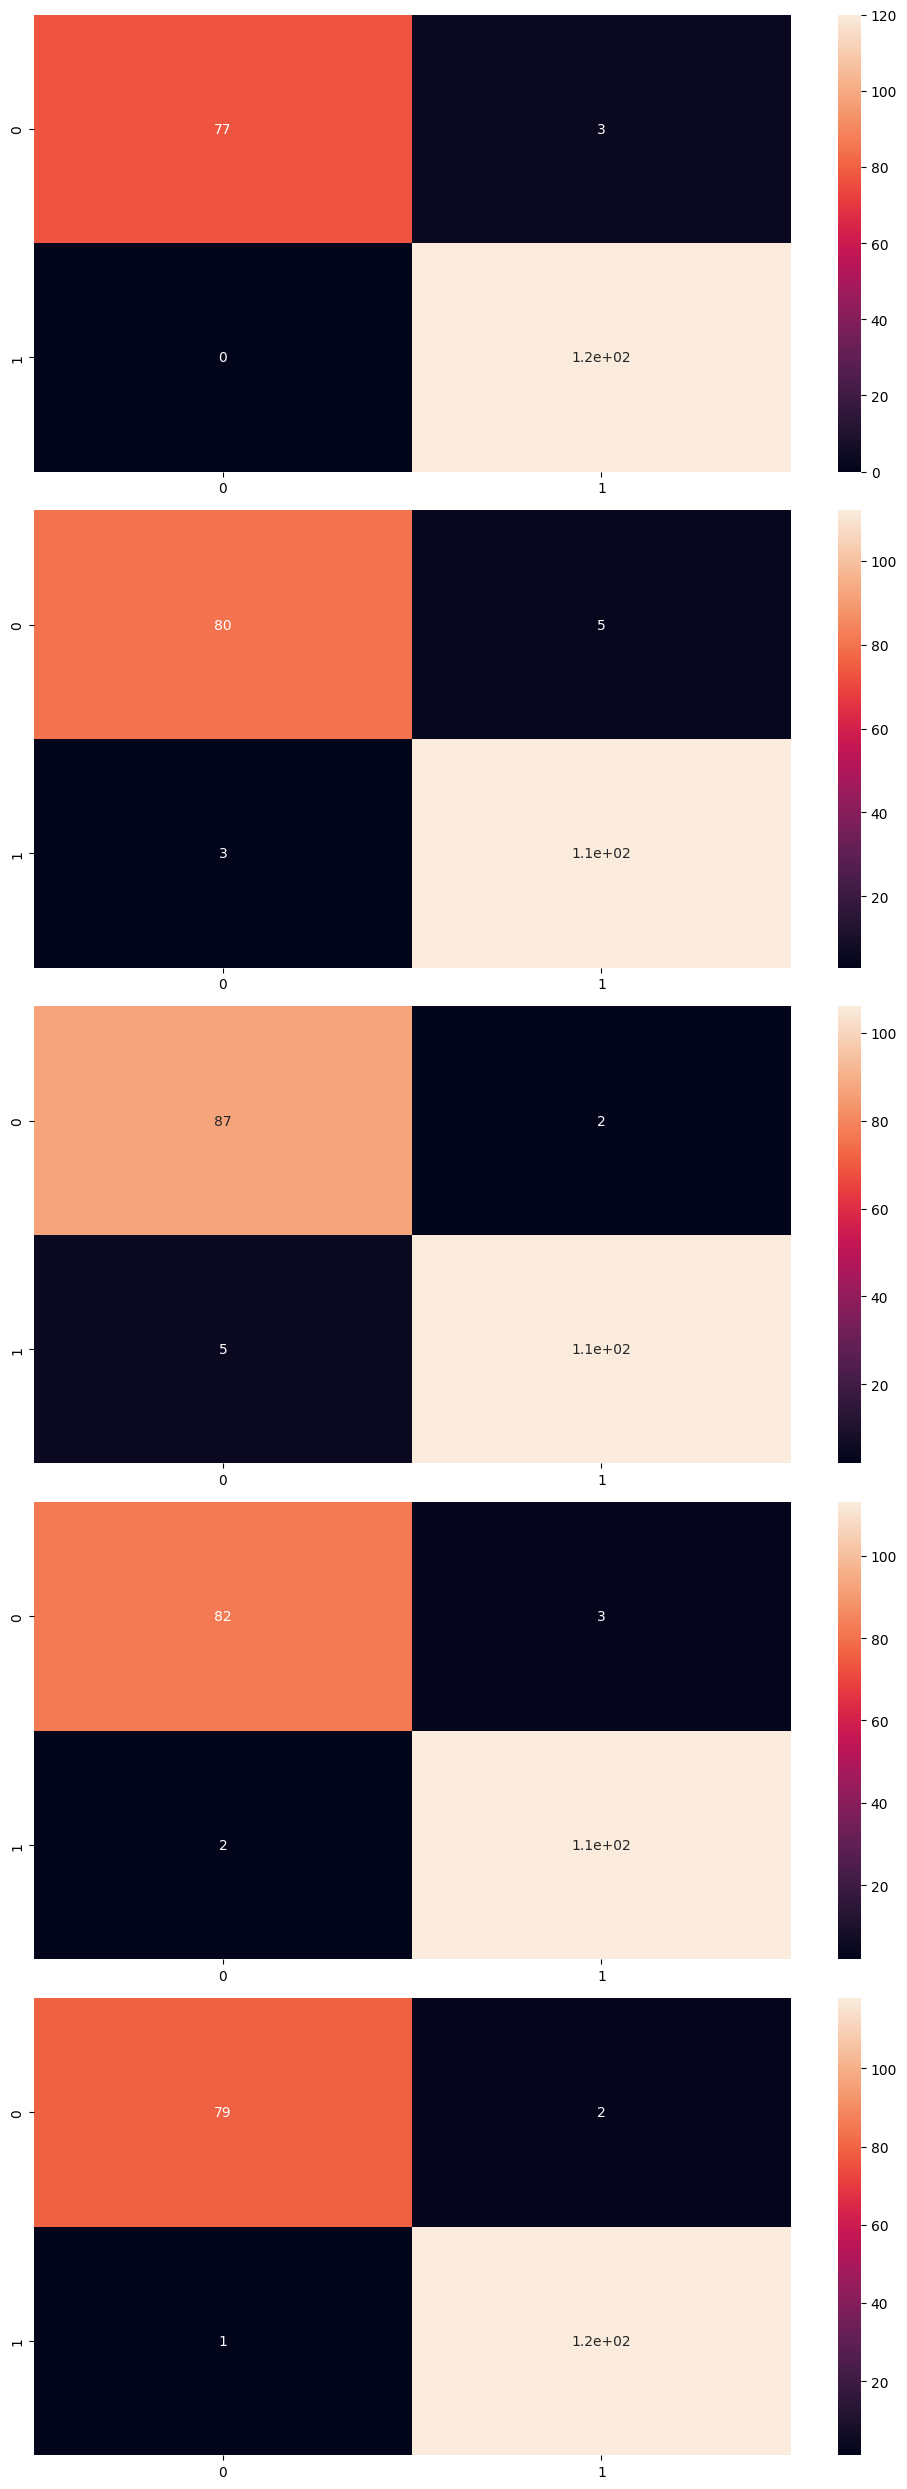

In [44]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
xgb_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    xgb = XGBClassifier()
    xgb.fit(train_X, train_y)
    y_pred = xgb.predict(test_X)
    xgb_model.append(xgb)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of xgb", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion="entropy",random_state=42)

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        80
         1.0       0.96      0.96      0.96       120

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy score of dec   0.95
************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94        85
         1.0       0.96      0.94      0.95       115

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

Accuracy score of dec   0.945
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91        89
         1.0       0.97      0.88    

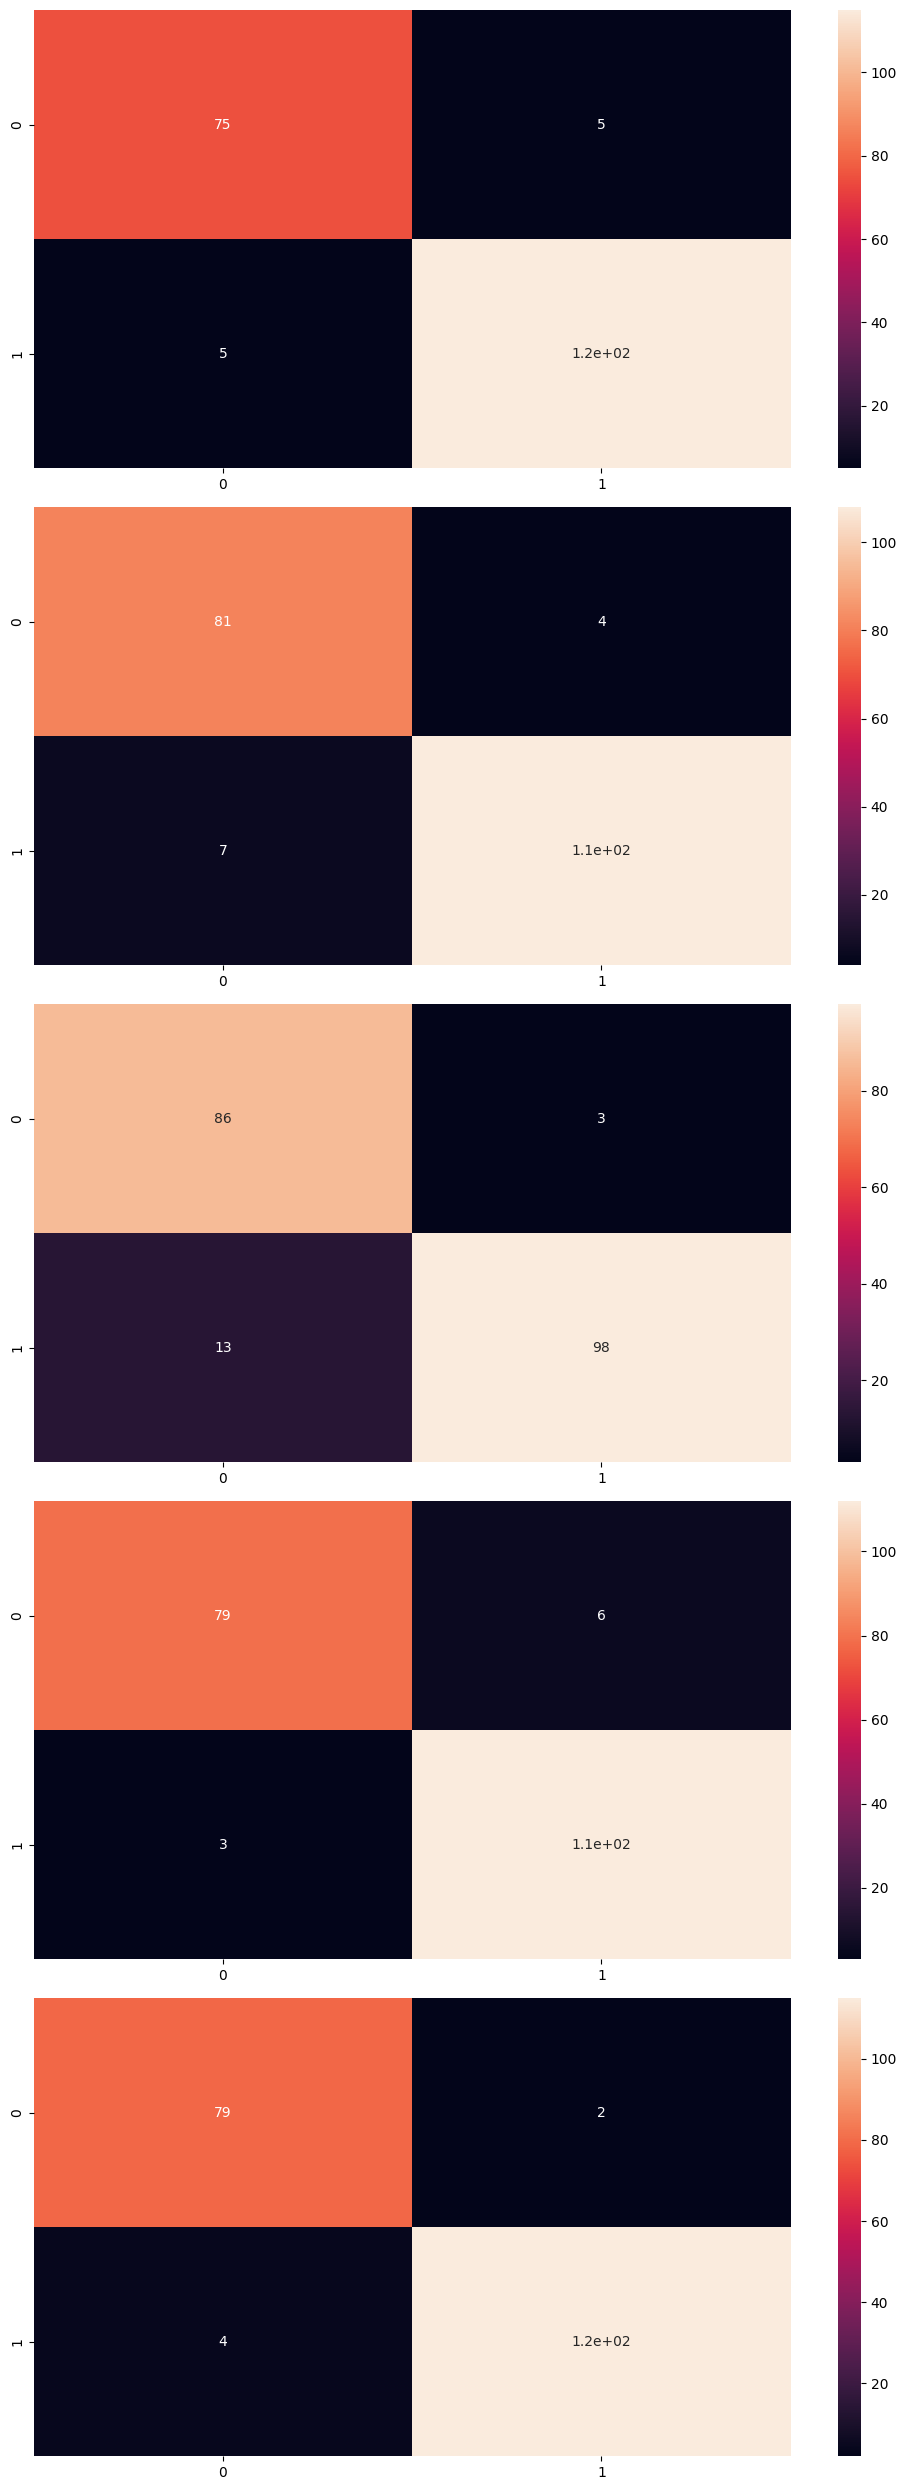

In [46]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
dec_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    dec = DecisionTreeClassifier(criterion="entropy",random_state=42)
    dec.fit(train_X, train_y)
    y_pred = dec.predict(test_X)
    dec_model.append(dec)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of dec", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        80
         1.0       0.98      1.00      0.99       120

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Accuracy score of rfc   0.99


<ipython-input-48-bb38954e91ed>:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        85
         1.0       0.98      0.97      0.98       115

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Accuracy score of rfc   0.975


<ipython-input-48-bb38954e91ed>:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        89
         1.0       0.97      0.97      0.97       111

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy score of rfc   0.97


<ipython-input-48-bb38954e91ed>:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98        85
         1.0       0.97      0.99      0.98       115

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy score of rfc

<ipython-input-48-bb38954e91ed>:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



   0.98
************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        81
         1.0       0.98      0.97      0.98       119

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Accuracy score of rfc   0.975


<ipython-input-48-bb38954e91ed>:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



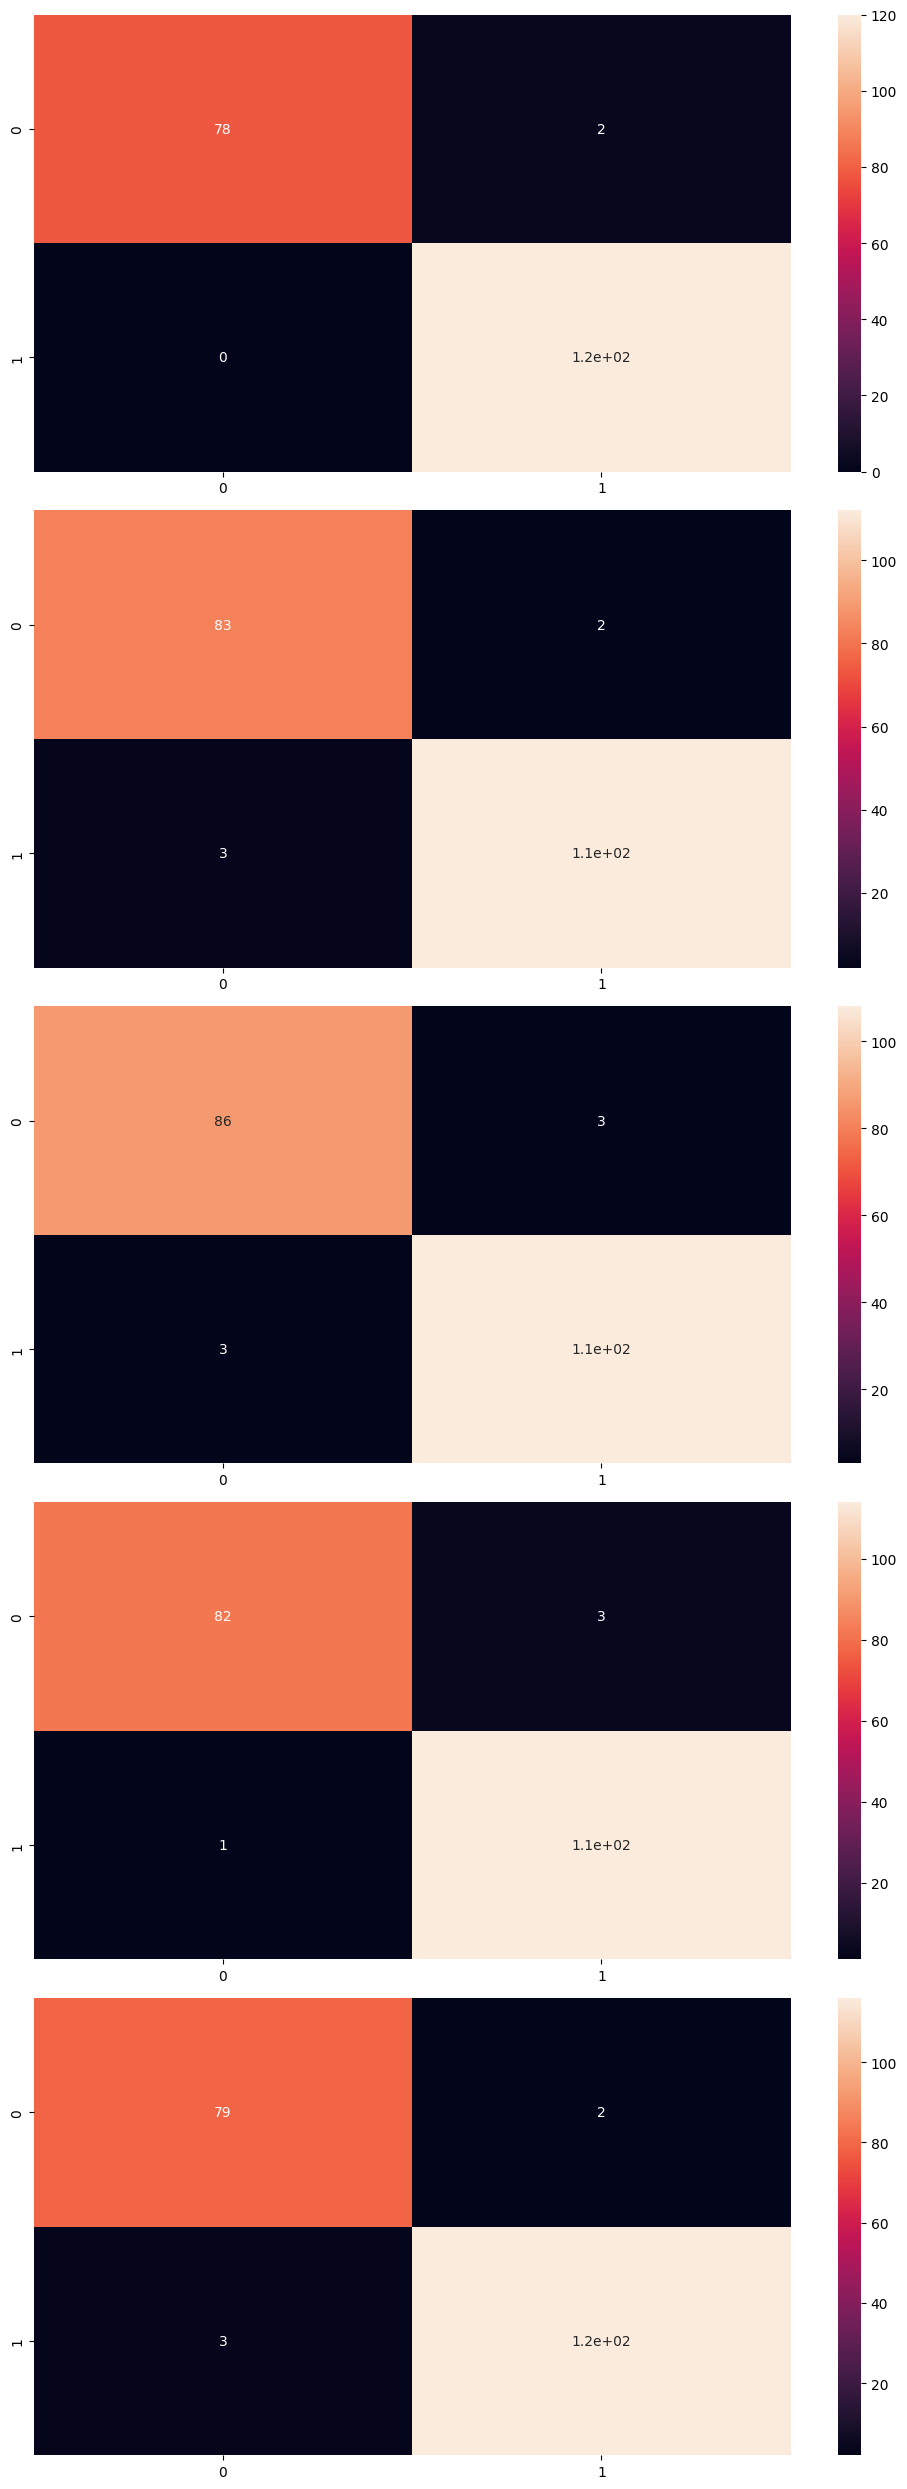

In [48]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
rfc_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    rfc = RandomForestClassifier(n_estimators= 30,random_state=42)
    rfc.fit(train_X, train_y)
    y_pred = rfc.predict(test_X)
    rfc_model.append(rfc)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of rfc", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(11,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

************** FOR fold No. 0 ****************
7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        80
         1.0       0.97      0.93      0.95       120

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of NN Model is:  0.94
************** FOR fold No. 1 ****************
7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        85
         1.0       0.97      0.90      0.94       115

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Accuracy score of NN Model is:  0.93
************** FOR fold No. 2 ****************
7/7 [========================

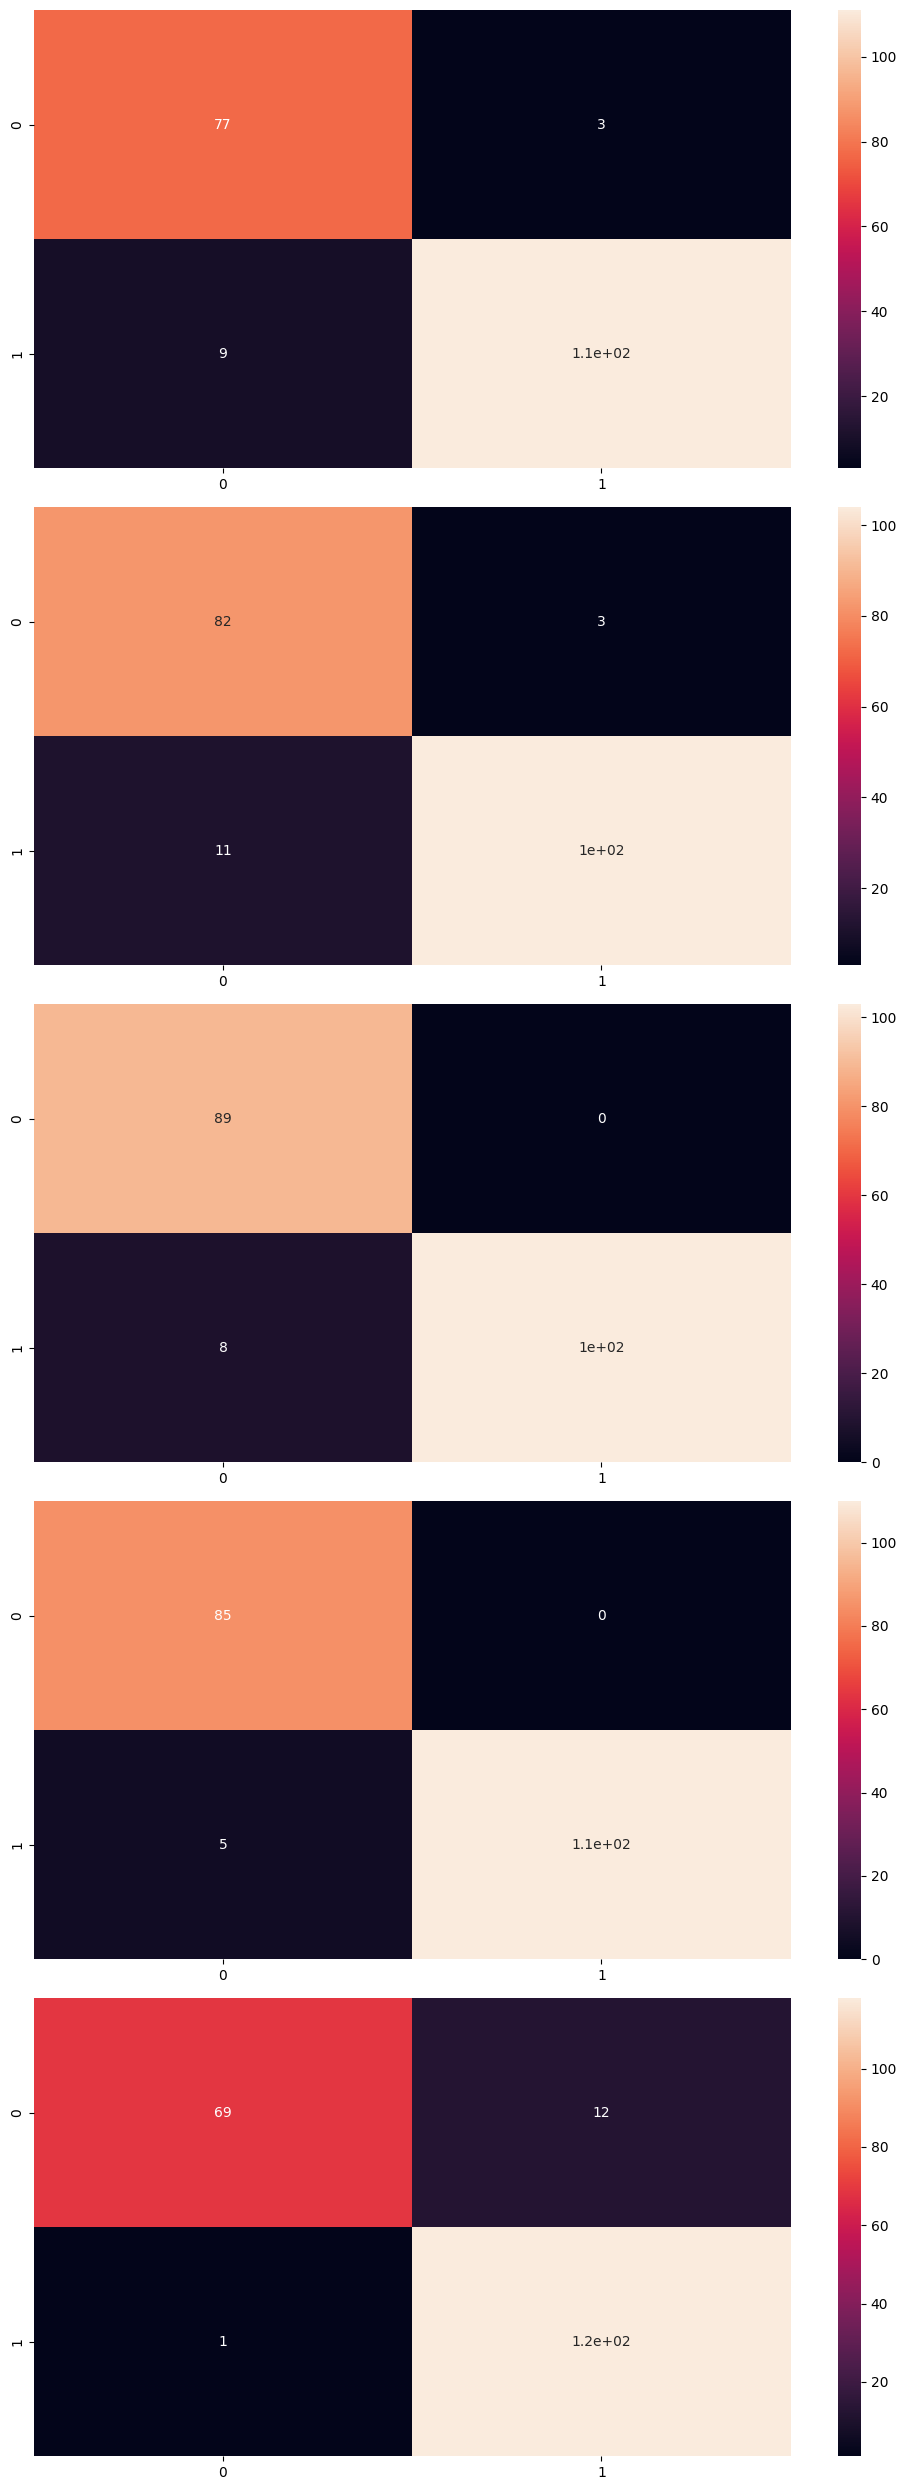

In [51]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)

    for i in range(len(y_pred)):
      if(y_pred[i]>0.5):
        y_pred[i]=[1]
      else:
        y_pred[i]=[0]

    y_pred = np.squeeze(y_pred)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of NN Model is: ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [52]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.7 MB/s eta 0:00:00


In [53]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()

Streaming output truncated to the last 5000 lines.
59:	learn: 0.2408343	total: 154ms	remaining: 2.41s
60:	learn: 0.2366339	total: 155ms	remaining: 2.39s
61:	learn: 0.2337298	total: 157ms	remaining: 2.38s
62:	learn: 0.2305904	total: 158ms	remaining: 2.35s
63:	learn: 0.2272568	total: 160ms	remaining: 2.34s
64:	learn: 0.2241615	total: 162ms	remaining: 2.33s
65:	learn: 0.2211511	total: 163ms	remaining: 2.31s
66:	learn: 0.2178355	total: 165ms	remaining: 2.29s
67:	learn: 0.2144223	total: 166ms	remaining: 2.27s
68:	learn: 0.2121212	total: 167ms	remaining: 2.25s
69:	learn: 0.2091240	total: 169ms	remaining: 2.24s
70:	learn: 0.2064517	total: 170ms	remaining: 2.23s
71:	learn: 0.2038280	total: 172ms	remaining: 2.21s
72:	learn: 0.2007894	total: 173ms	remaining: 2.2s
73:	learn: 0.1990051	total: 176ms	remaining: 2.2s
74:	learn: 0.1969596	total: 177ms	remaining: 2.18s
75:	learn: 0.1939613	total: 178ms	remaining: 2.17s
76:	learn: 0.1916045	total: 180ms	remaining: 2.15s
77:	learn: 0.1901382	total: 181ms

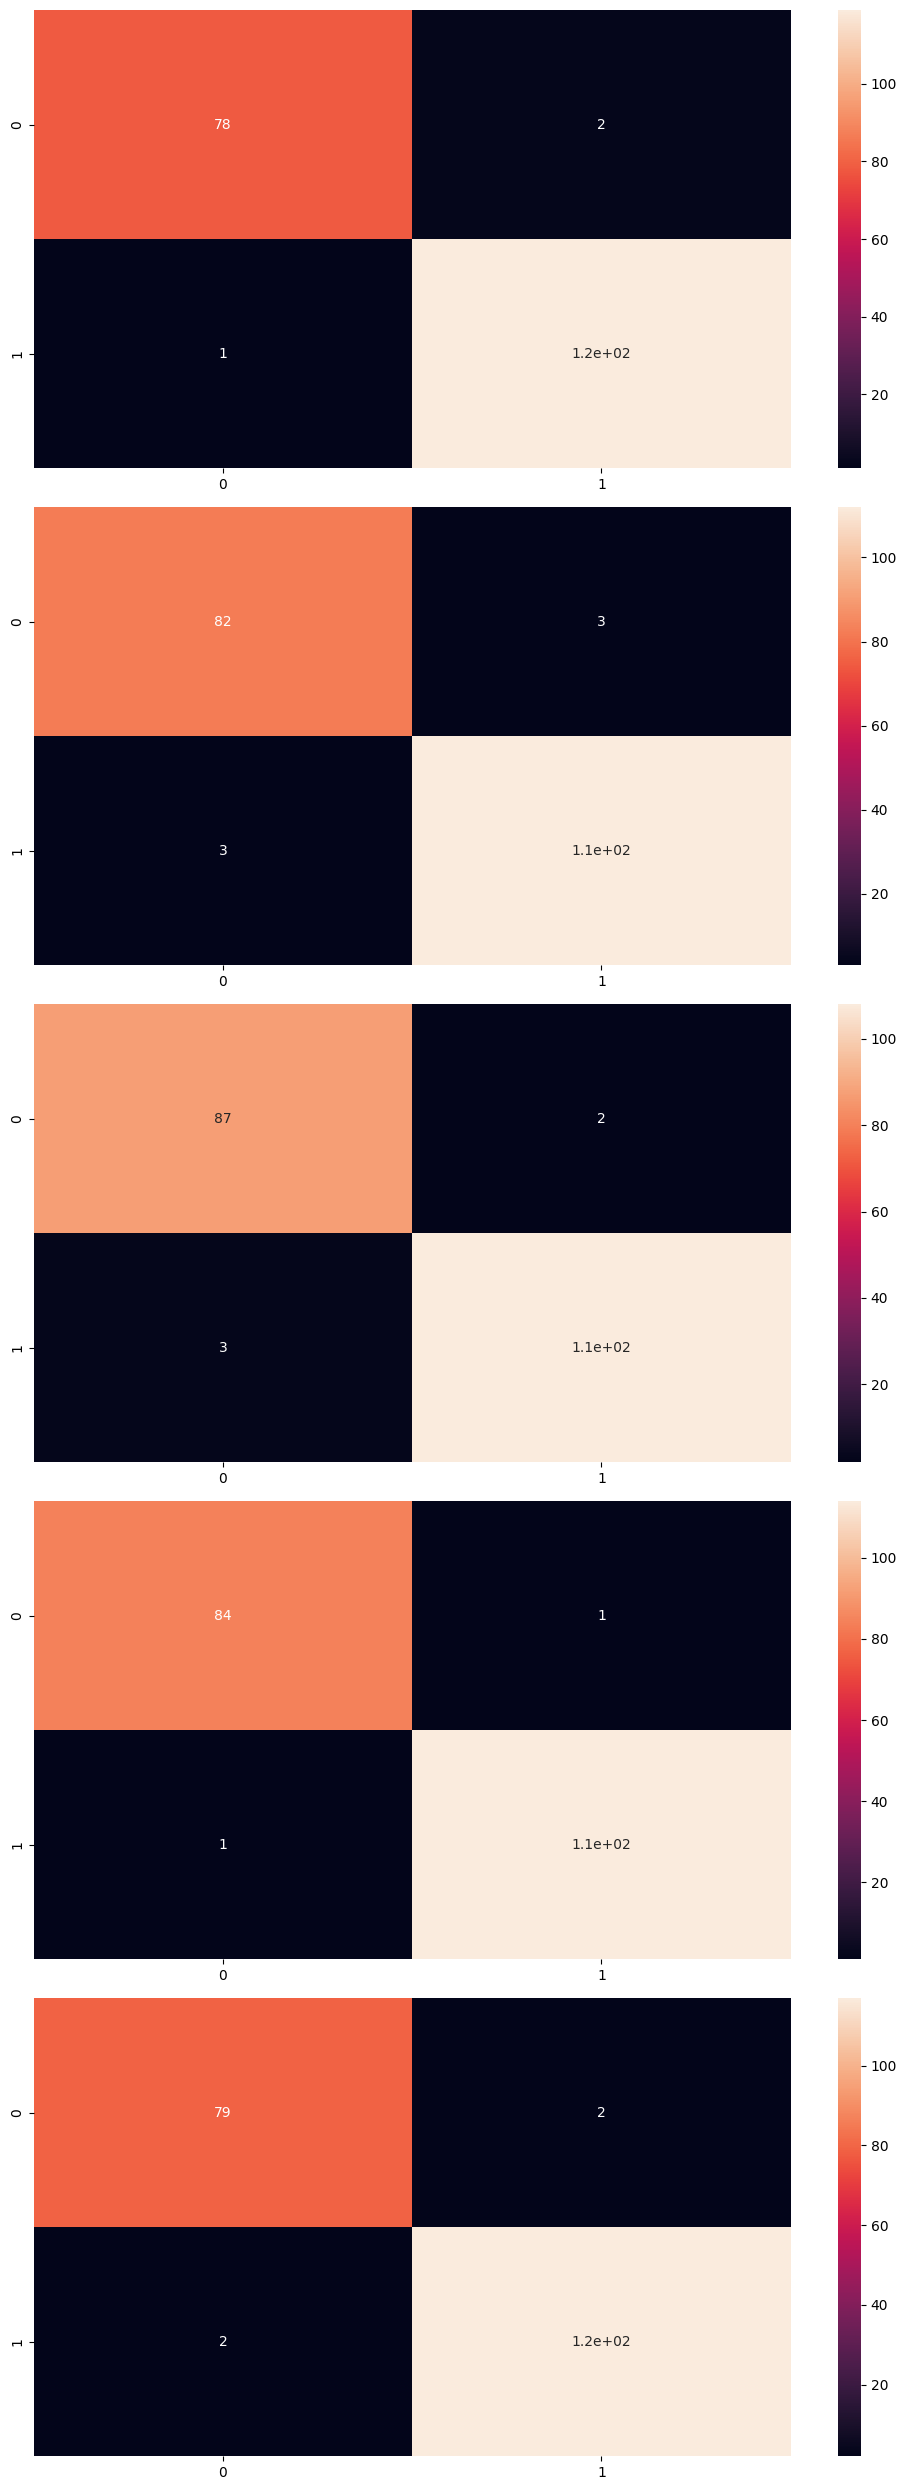

In [54]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
clf_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    clf = CatBoostClassifier()
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    clf_model.append(clf)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of clf", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
[LightGBM] [Info] Number of positive: 460, number of negative: 340
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.575000 -> initscore=0.302281
[LightGBM] [Info] Start training from score 0.302281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        80
         1.0       0.98      1.00      0.99       120

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Accuracy score of lgb_c   0.99
************** FOR fold No. 1 ****************
[LightGBM] [Info] Number of positive: 465, number of negative: 335
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.581250 -> initscore=0.327907
[LightGBM] [Info] Start training from score 0.327907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 2 ****************
[LightGBM] [Info] Number of positive: 469, number of negative: 331
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586250 -> initscore=0.348484
[LightGBM] [Info] Start training from score 0.348484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
[LightGBM] [Info] Number of positive: 465, number of negative: 335
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.581250 -> initscore=0.327907
[LightGBM] [Info] Start training from score 0.327907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        85
         1.0       0.99      1.00      1.00       115

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy score of lgb_c   0.995
************** FOR fold No. 4 ****************
[LightGBM] [Info] Number of positive: 461, number of negative: 339
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576250 -> initscore=0.307398
[LightGBM] [Info] Start training from score 0.307398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



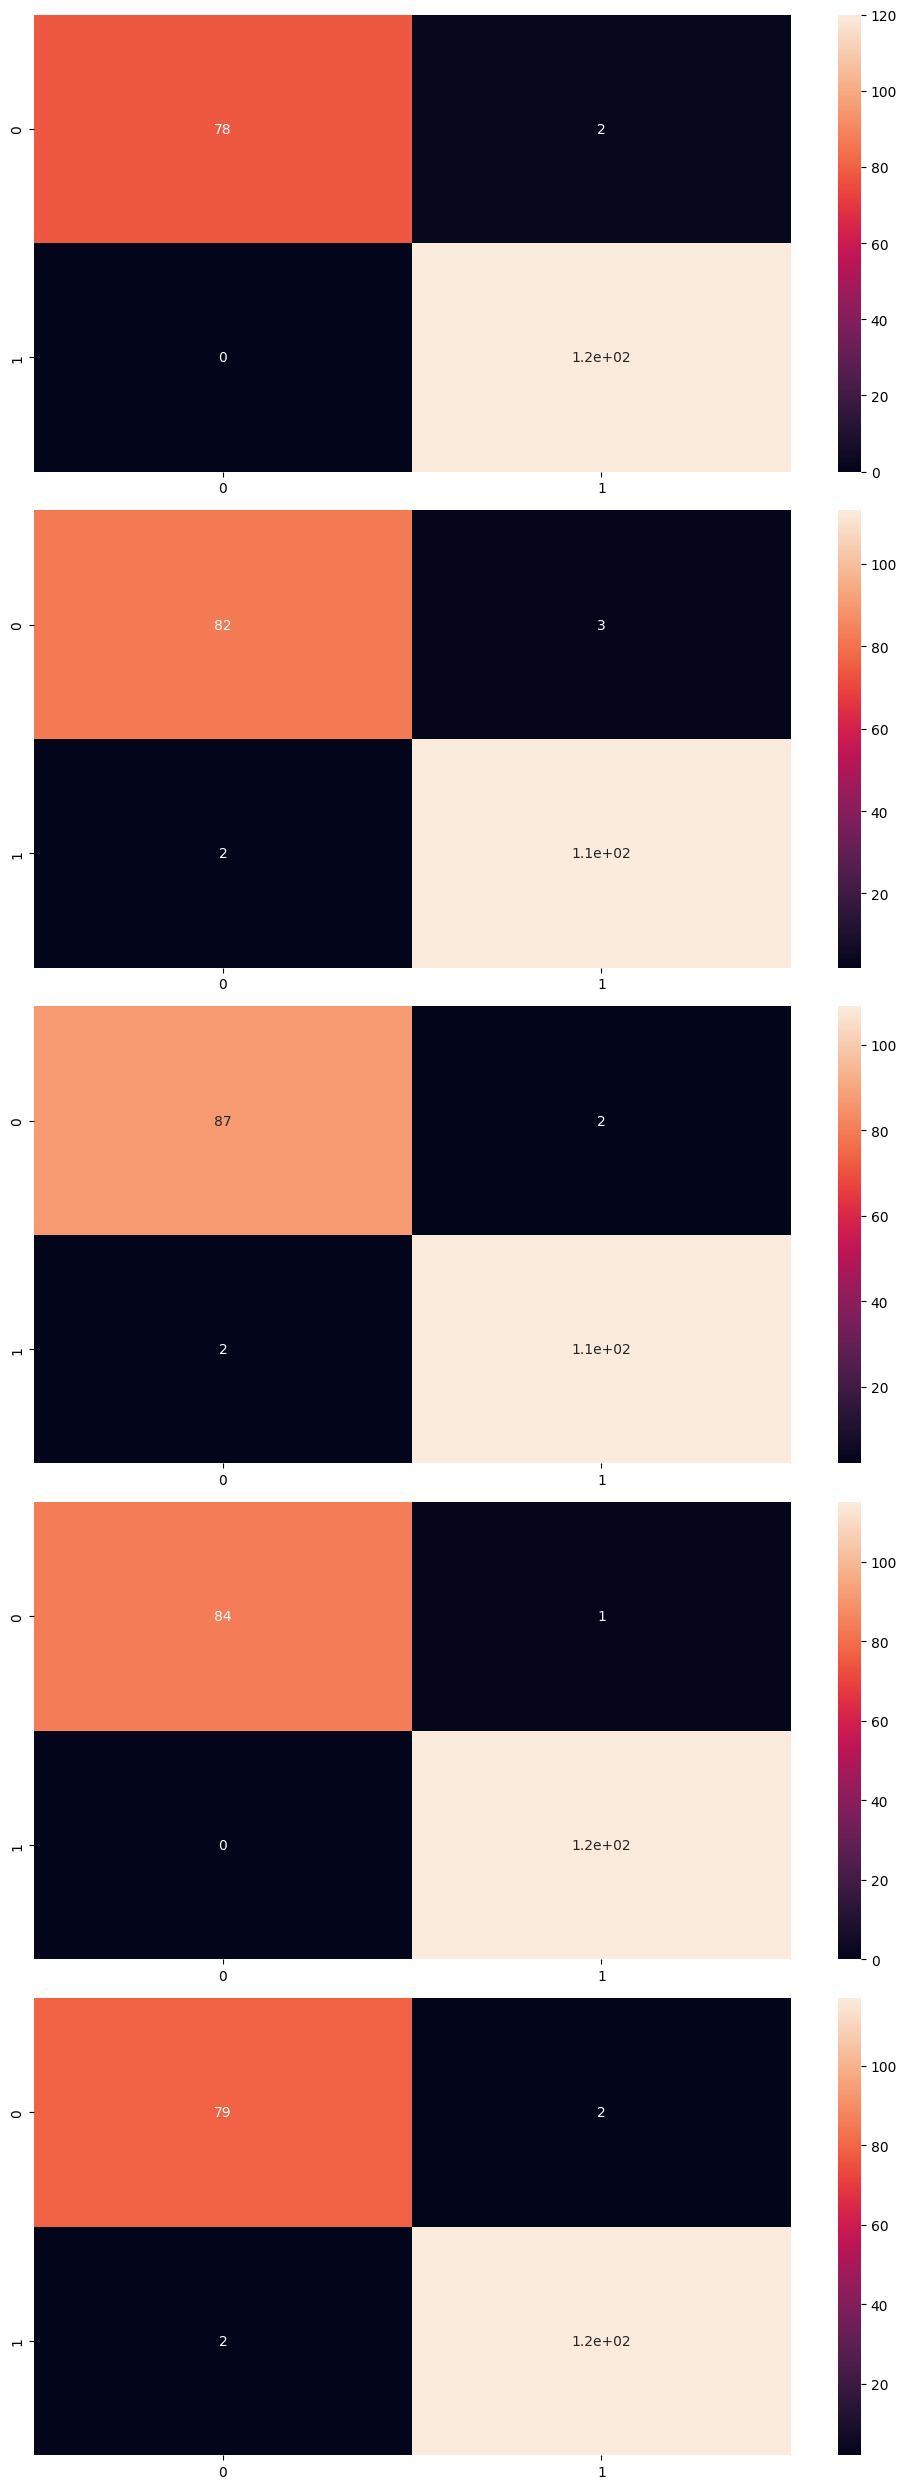

In [55]:
import lightgbm as lgb

lgb_c = lgb.LGBMClassifier(force_row_wise=True)

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
lgb_c_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    lgb_c = lgb.LGBMClassifier(force_row_wise=True)
    lgb_c.fit(train_X, train_y)
    y_pred = lgb_c.predict(test_X)
    lgb_c_model.append(lgb_c)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of lgb_c", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        80
         1.0       0.98      0.99      0.99       120

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Accuracy score of svc_c   0.985


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        85
         1.0       0.96      0.95      0.96       115

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy score of svc_c   0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94        89
         1.0       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of svc_c   0.945


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        85
         1.0       0.97      0.98      0.98       115

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy score of svc_c   0.975


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        81
         1.0       0.97      0.97      0.97       119

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

Accuracy score of svc_c   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



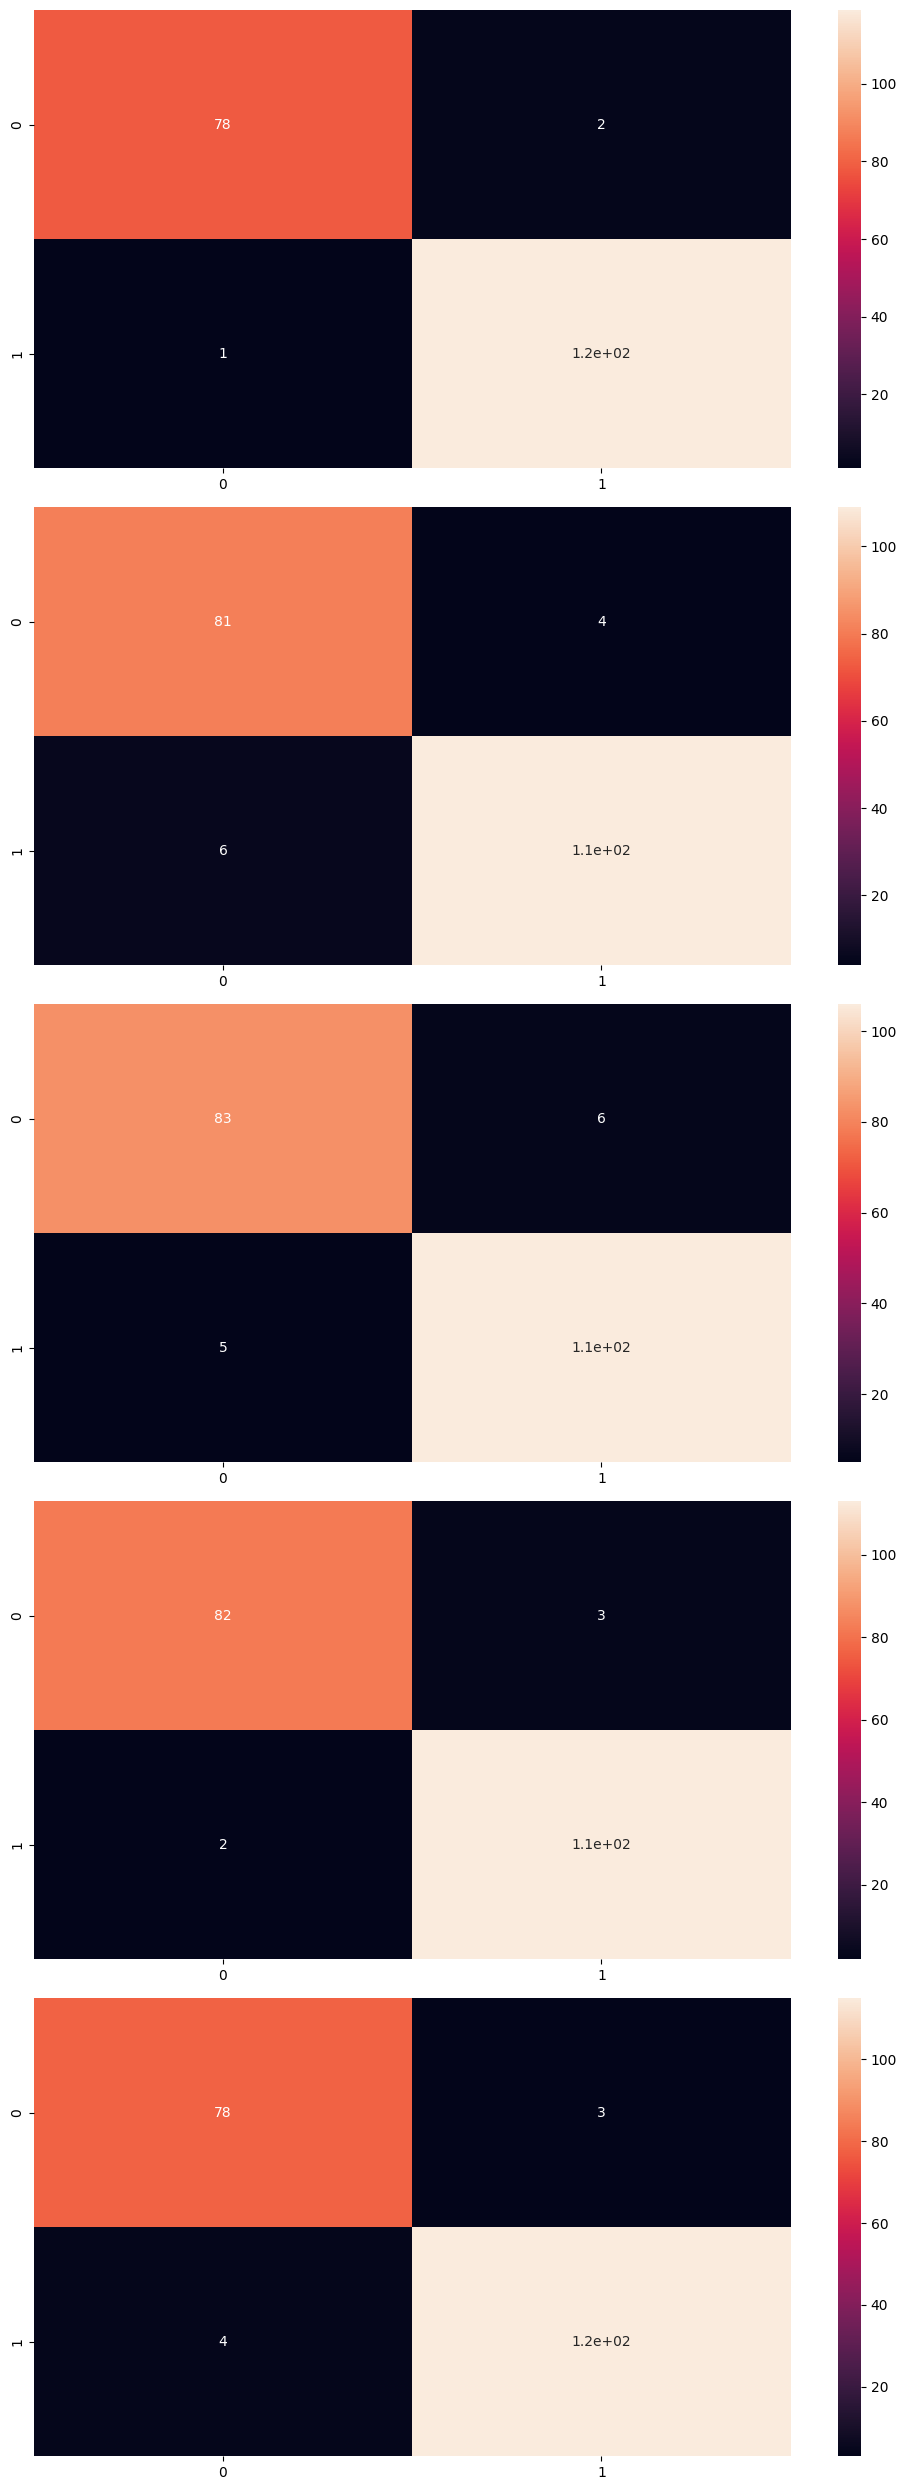

In [56]:
from sklearn.svm import SVC

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
svc_c_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    svc_c=SVC(random_state=22)
    svc_c.fit(train_X, train_y)
    y_pred = svc_c.predict(test_X)
    svc_c_model.append(svc_c)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of svc_c", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        80
         1.0       0.98      0.99      0.99       120

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Accuracy score of log_r   0.985


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        85
         1.0       0.95      0.95      0.95       115

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of log_r   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        89
         1.0       0.96      0.95      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

Accuracy score of log_r   0.955


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        85
         1.0       0.97      0.97      0.97       115

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy score of log_r   0.97


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        81
         1.0       0.97      0.95      0.96       119

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy score of log_r   0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



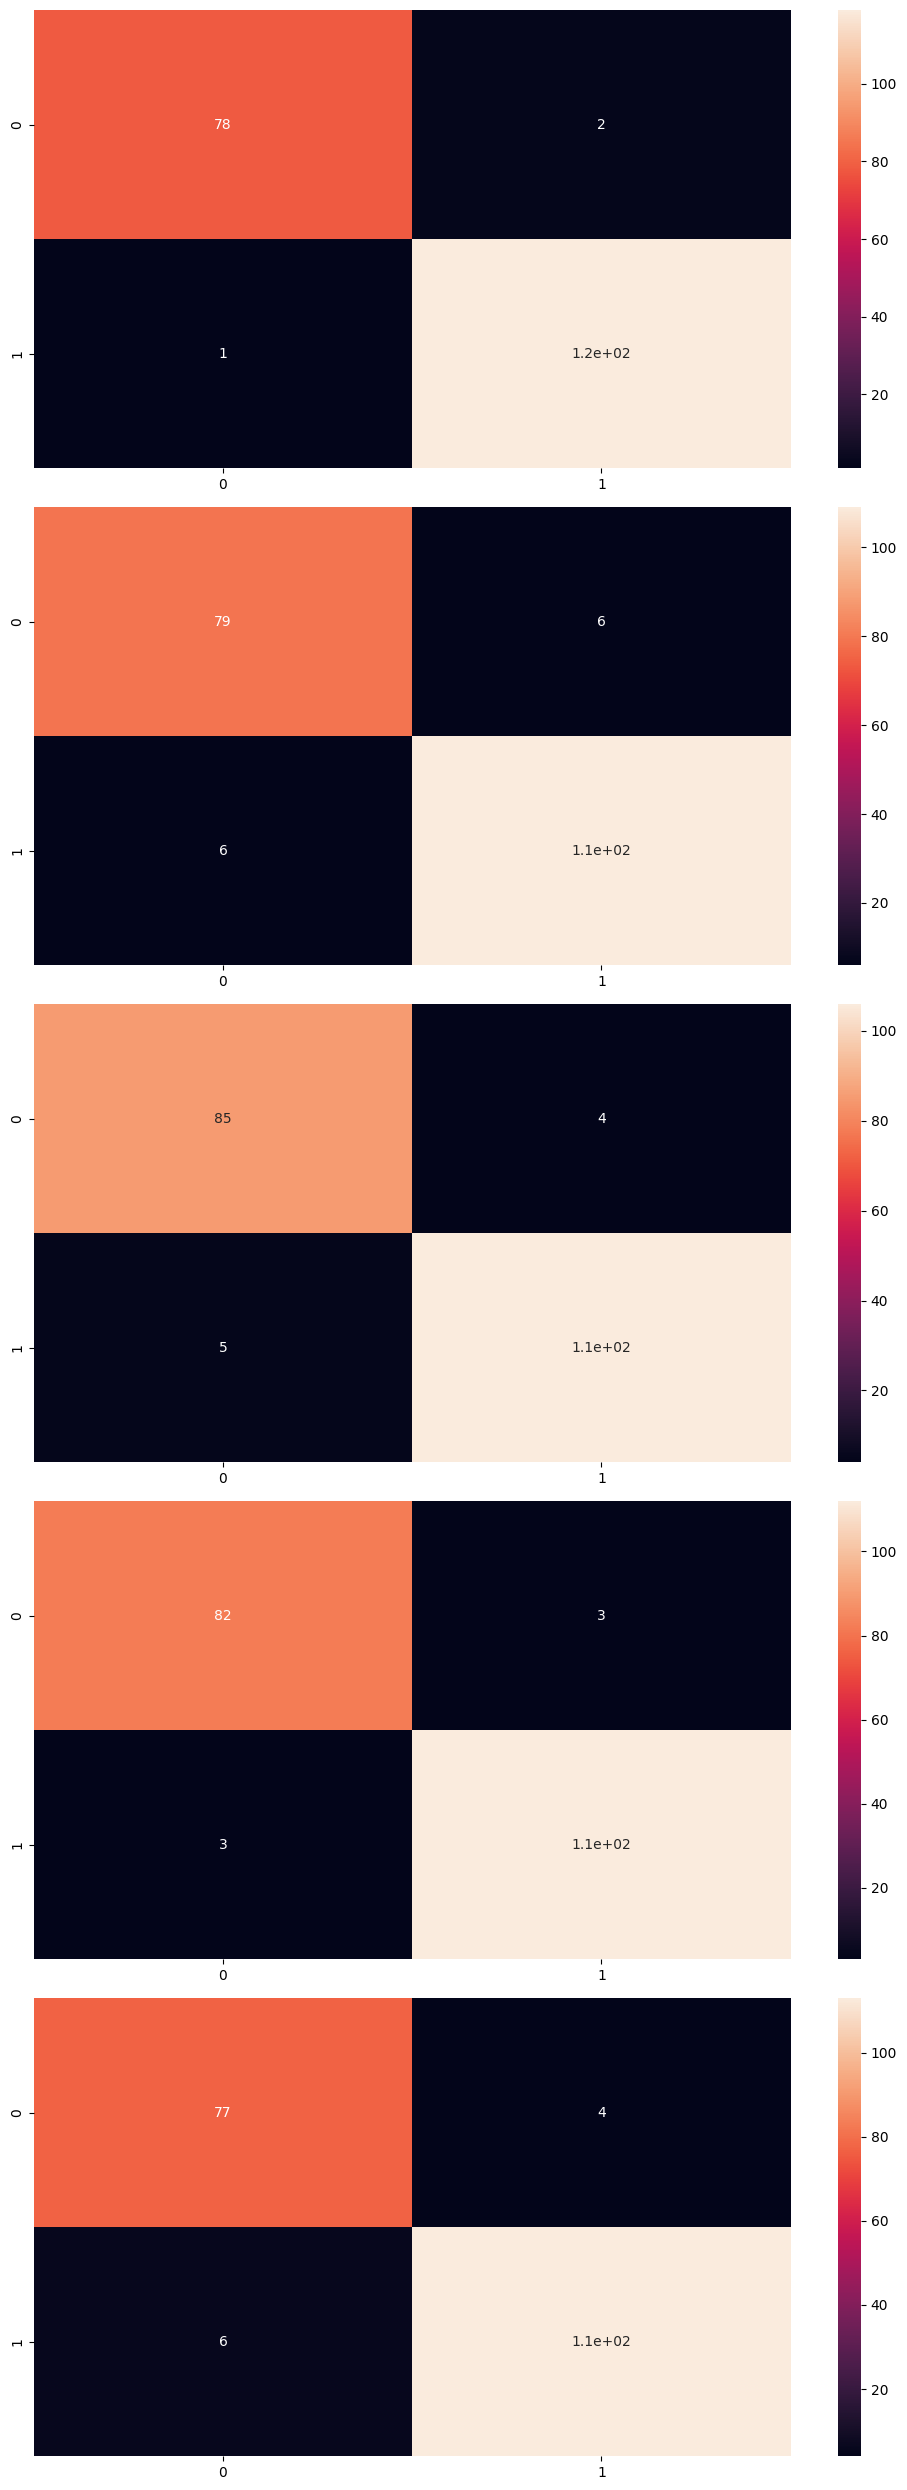

In [57]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
log_r_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    log_r = LogisticRegression(max_iter=10000,random_state=22)
    log_r.fit(train_X, train_y)
    y_pred = log_r.predict(test_X)
    log_r_model.append(log_r)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of log_r", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        80
         1.0       0.97      0.97      0.97       120

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

Accuracy score of KNN_Model   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        85
         1.0       0.94      0.95      0.94       115

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200

Accuracy score of KNN_Model   0.935


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        89
         1.0       0.92      0.97      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of KNN_Model   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        85
         1.0       0.94      0.96      0.95       115

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of KNN_Model   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92        81
         1.0       0.93      0.96      0.95       119

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Accuracy score of KNN_Model   0.935


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



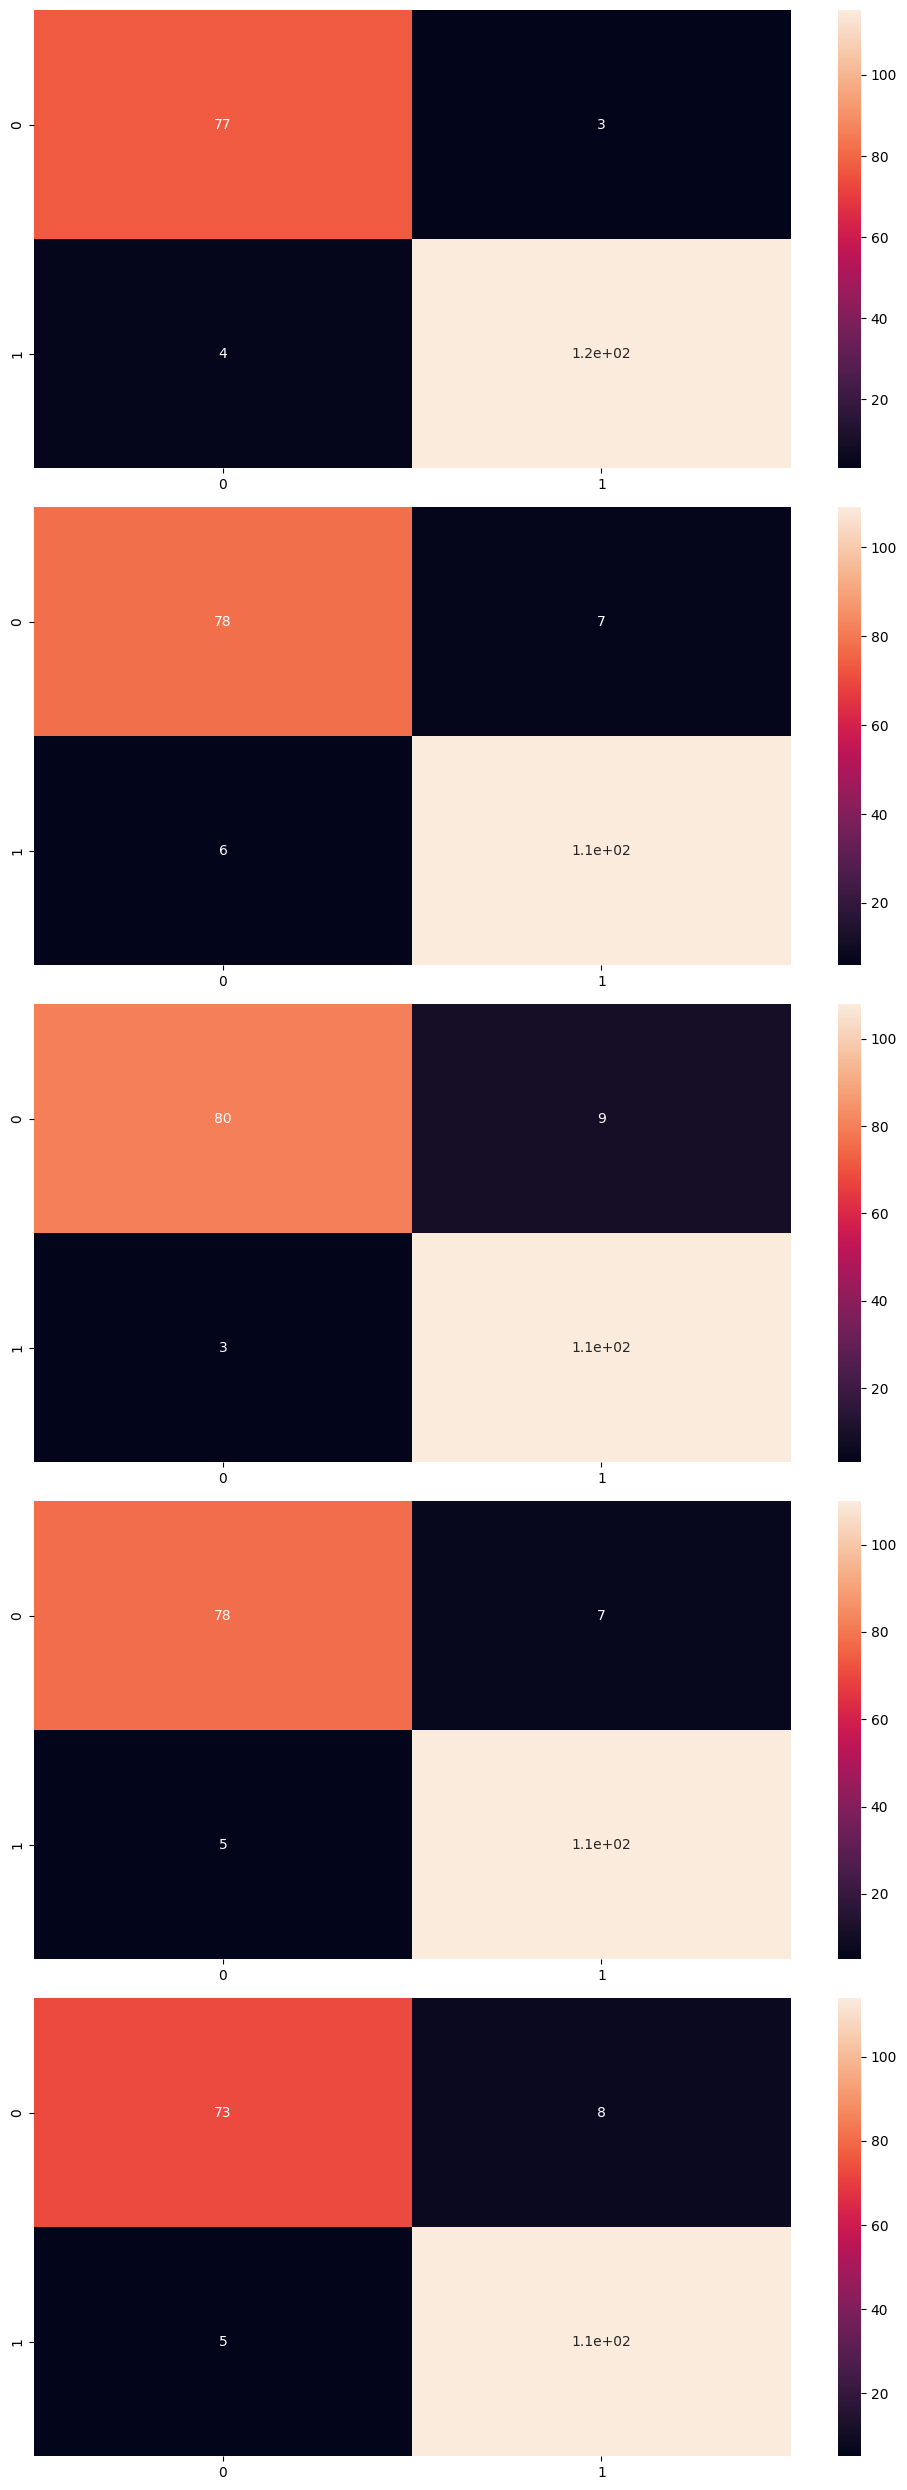

In [58]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
KNN_Model_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    KNN_Model = KNeighborsClassifier()
    KNN_Model.fit(train_X, train_y)
    y_pred = KNN_Model.predict(test_X)
    KNN_Model_model.append(KNN_Model)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of KNN_Model", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        80
         1.0       0.97      0.97      0.97       120

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

Accuracy score of GNB_Model   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        85
         1.0       0.94      0.96      0.95       115

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of GNB_Model   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        89
         1.0       0.94      0.96      0.95       111

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

Accuracy score of GNB_Model   0.945


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        85
         1.0       0.94      0.97      0.96       115

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy score of GNB_Model   0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        81
         1.0       0.94      0.96      0.95       119

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of GNB_Model   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



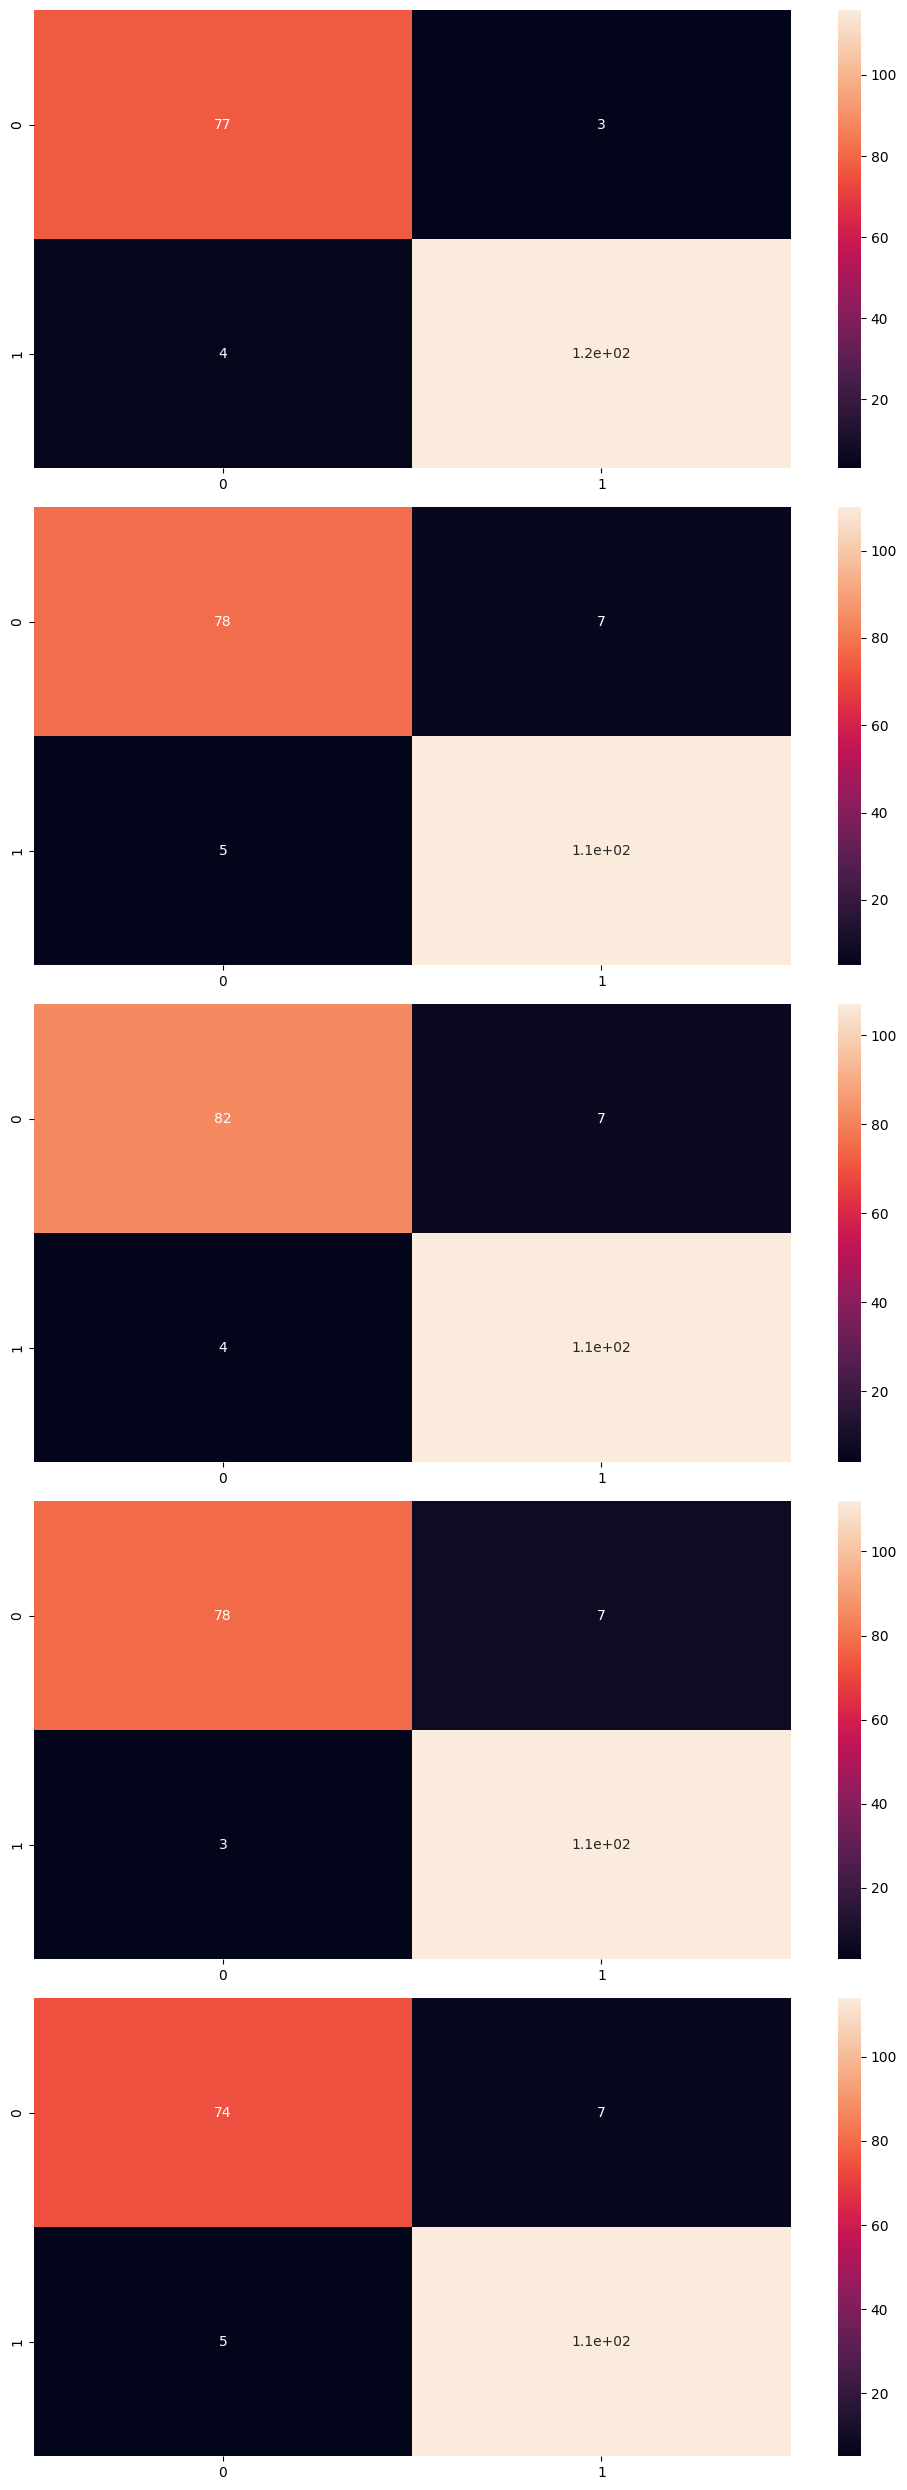

In [59]:
from sklearn.naive_bayes import GaussianNB

GNB_Model = GaussianNB()

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)
GNB_Model_model=[]
# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    GNB_Model = GaussianNB()
    GNB_Model.fit(train_X, train_y)
    y_pred = GNB_Model.predict(test_X)
    GNB_Model_model.append(GNB_Model)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of GNB_Model", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [60]:
import pickle

In [61]:
pickle.dump(xgb_model[2], open('xgb.pkl', 'wb'))
pickle.dump(dec_model[2], open('dec.pkl', 'wb'))
pickle.dump(rfc_model[2], open('rfc.pkl', 'wb'))
pickle.dump(model, open('NN.pkl', 'wb'))
pickle.dump(clf_model[1], open('clf.pkl', 'wb'))
pickle.dump(lgb_c_model[1], open('lgb_c.pkl', 'wb'))
pickle.dump(svc_c_model[2], open('svc_c.pkl', 'wb'))
pickle.dump(log_r_model[1], open('log_r.pkl', 'wb'))
pickle.dump(KNN_Model_model[1], open('KNN.pkl', 'wb'))
pickle.dump(GNB_Model_model[4], open('GNB.pkl', 'wb'))